In [1]:
# imports
import io
import os
import sys
import dvc.api
import mlflow
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# adding scripts
sys.path.append('.')
sys.path.append('..')
sys.path.insert(1, '../scripts/')
import defaults as defs
import dataCleaner as dc
import dataVisualizer as dv

cleaner = dc.dataCleaner('exploratory data analysis notebook')
visualizer = dv.dataVisualizer('exploratory data analysis notebook')

--> <Logger dataCleaner (WARNING)>
logger <Logger dataCleaner (DEBUG)> created at path: ../logs/cleaner_root.log
Data cleaner in action
--> <Logger dataVisualizer (WARNING)>
logger <Logger dataVisualizer (DEBUG)> created at path: ../logs/visualizer_root.log
Data visualizer in action


In [3]:
# pandas settings
pd.set_option('display.max_columns', 30)

# version of the data
# v1 : gdrive 
# v2 : local messed up store
# v3 : local correct store
# v4 : local store: merged data file generated, data preparation completed
version = 'v4'

# read data sets using dvc api
test_data_url = dvc.api.get_url(path = defs.test_local_path, 
                                repo = defs.repo, 
                                rev = version)

train_data_url = dvc.api.get_url(path = defs.train_local_path, 
                                repo = defs.repo, 
                                rev = version)

store_data_url = dvc.api.get_url(path = defs.store_local_path, 
                                repo = defs.repo, 
                                rev = version)

full_data_url = dvc.api.get_url(path = defs.merged_local_path, 
                                repo = defs.repo, 
                                rev = version)
print('test data path: ' + test_data_url, '\ntrain data path: ' + train_data_url, '\nstore data path: ' + store_data_url, '\nmerged data path: ' + full_data_url)

test data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\d5\d6373bc6743cde41c22b4599dce90c 
train data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\1f\38ace4291877fe3b742e8b7a111377 
store data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\21\ffe65b18f58f4b58193c968654814c 
merged data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\2c\45c8bfea2787f193cb56fe88d8df04


In [4]:
# reading csv files
DateCols = ['Date']
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']

test_data = pd.read_csv(test_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
train_data = pd.read_csv(train_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
full_data = pd.read_csv(full_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
store_data = pd.read_csv(store_data_url, na_values=missing_values, low_memory=False)

# Exploratory data analysis

## Univariate analysis

### Non-Graphical Univariate Analysis

In [9]:
full_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5472.856067,3323.989208,0.0,3727.0,5744.0,7584.0,14049.0
Customers,1017209.0,578.349312,348.356502,0.0,405.0,609.0,794.0,1485.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209.0,0.045163,0.283656,0.0,0.0,0.0,0.0,3.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,5.846762,3.326097,1.0,3.0,6.0,8.0,12.0


### Graphical Univariate Analysis

#### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

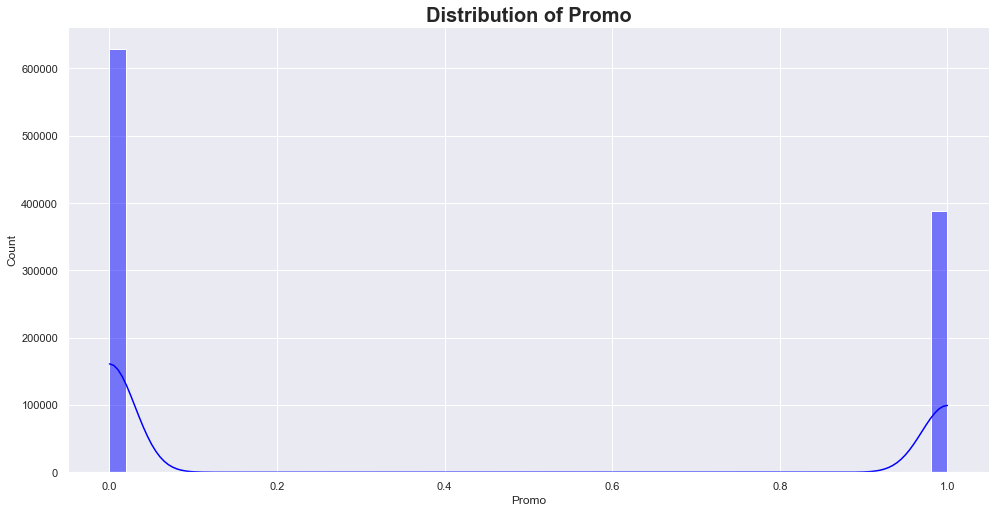

In [11]:
visualizer.plot_hist(train_data, 'Promo', 'blue')

In [ ]:
plot_hist(test_data, 'Promo', 'purple')

#### Store type

In [ ]:
# unique value counts
counts_df = store_data['StoreType'].value_counts()
counts_df

In [ ]:
plotly_plot_pie(store_data, 'StoreType')

#### Assortment

In [ ]:
# unique value counts
counts_df = store_data['Assortment'].value_counts()
counts_df

In [ ]:
plotly_plot_pie(store_data, 'Assortment')

In [ ]:
plotly_plot_hist(store_data, 'CompetitionDistance')

#### Day of week

In [ ]:
plot_count(train_data, 'DayOfWeek')

#### Sales

In [12]:
plot_hist(train_data, 'Sales', 'green')

NameError: name 'plot_hist' is not defined

#### Customers

In [ ]:
plot_hist(train_data, 'Customers', 'blue')

#### 0pen

In [ ]:
plot_count(train_data, 'Open')

#### Promo

In [ ]:
plot_count(train_data, 'Promo')

In [ ]:
# unique value counts
counts_df = store_data['Promo2'].value_counts()
counts_df

In [ ]:
plot_count(store_data, 'Promo2')

#### Holidays

In [ ]:
# unique value counts
counts_df = train_data['StateHoliday'].value_counts()
counts_df

In [ ]:
plotly_plot_pie(train_data, 'StateHoliday')

In [ ]:
# unique value counts
counts_df = train_data['SchoolHoliday'].value_counts()
counts_df

In [ ]:
plotly_plot_pie(train_data, 'SchoolHoliday')

## Bivariate analysis

### Graphical analysis

#### Check & compare sales behavior before, during and after holidays

In [ ]:
state_holiday_list = train_data['StateHoliday'].values.tolist()
sales_timing_list = modify_holiday_list(state_holiday_list)
timing_added_df = train_data.loc[:,['Sales','Customers']]
timing_added_df['HolidayTiming'] = sales_timing_list
grouped_timing = timing_added_df.groupby('HolidayTiming').agg(
    {'Sales': 'mean', 'Customers': 'mean'})
grouped_timing = grouped_timing.iloc[:3, :]

plt.figure(figsize=(10,5))
X_axis = np.arange(len(grouped_timing.index))
plt.bar(X_axis - 0.2, grouped_timing['Sales'], 0.4, label='Sales')
plt.bar(X_axis + 0.2, grouped_timing['Customers'], 0.4, label='Customers')

plt.xticks(X_axis, grouped_timing.index)
plt.xlabel("Holiday Timing")
plt.ylabel("Mean Value")
plt.title("Sales and Customers Based on Holiday Timing")
plt.legend()

#### Find out any seasonal (Christmas, Easter etc) purchase behaviors

In [ ]:
average_sales = train_data.groupby('StateHoliday')["Sales"].mean()
ax1 = average_sales.plot(legend=True,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist())

In [ ]:
# aggregated df from sales mean and customers mean
seasonal = train_data.groupby('StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[2:,:]
seasonal.head()

In [ ]:
#seasonal.index = ['Public Holiday','Easter Holiday','Christmas'] # check this out,this line must not have been commented
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')

In [ ]:
# seasonal index
# seasonal.index = ['Public Holiday','Easter Holiday','Christmas'] # check this out,this line must not have been commented
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, seasonal['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                       * 1.005, p.get_height() * 1.005))     
plt.xticks(X_axis, seasonal.index)
plt.xlabel("Season")
plt.ylabel("Amount")
plt.title("Sales and Customers During Holiday Seasons")
plt.show()

#### State holidays and sales

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data = train_data, ax = axis1).set_title('Comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (train_data["StateHoliday"] != "0") & (train_data["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=train_data[mask], ax=axis2).set_title('Sales during State holidays')
plt.show()

#### School Holidays with Sales and Customers

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=train_data, ax=axis1).set_title('Comparison of sales vs StateHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=train_data, ax=axis2).set_title('Comparison of customers vs StateHoliday')
plt.show()

#### Correlation between sales and number of customers?

In [ ]:
sales_customer_rln = train_data.loc[:,['Sales','Customers']]
sales_customer_corr = sales_customer_rln.corr()
sales_customer_corr.head()

In [ ]:
plot_heatmap_from_correlation(sales_customer_corr, 'Correlation b/n sales and customers')

#### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [ ]:
sales_promo_rln = full_data.loc[:,['Sales','Promo']]
sales_promo_corr = sales_promo_rln.corr()
sales_promo_corr.head()

In [ ]:
plot_heatmap_from_correlation(sales_customer_corr, 'Correlation b/n sales and Promotions')

#### Store type with sales and customers

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data = full_data, ax=axis1, palette = 'Set3', order = [0, 1, 2, 3]).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data = full_data, ax=axis2, palette = 'Set3', order = [0, 1, 2, 3]).set_title('No. of customers across different StoreType')
plt.show()

#### Assortment with Sales and customers

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data = full_data, palette = 'husl', order = [0, 1, 2], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data = full_data, palette = 'husl', order = [0, 1, 2], ax=axis2).set_title('Customers across different assortment types')
plt.show()

#### Day of week with sales and customers

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=train_data, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=train_data, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()

#### Promo with sales and customers

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=train_data, palette = 'Set1', ax=axis1).set_title('Sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=train_data, ax=axis2,  palette = 'Set1').set_title('Customers across different Promo')
plt.show()

#### Promo2 with Sales and Customers

In [ ]:
flatui = [ "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=full_data, ax=axis1, palette = flatui).set_title('Sales across different Promo2')
sns.barplot(x='Promo2', y='Customers', data=full_data, ax=axis2, palette = flatui).set_title('Customers across different Promo2')
plt.show()

#### Promo interval with sales and customers

In [ ]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# values with promo2 only
mask = (full_data["Promo2"] != 0)

sns.barplot(x='PromoInterval', y='Sales', data=full_data[mask], ax=axis1, palette = flatui).set_title('Sales across different promo intervals')
sns.barplot(x='PromoInterval', y='Customers', data=full_data[mask], ax=axis2, palette = flatui).set_title('Customers across different promo intervals')
plt.show()

#### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [ ]:
plot_scatter(full_data, 'Customers','Sales', 'scatter for month and sales', 'Promo', 'StoreType')

#### Month and Sales

In [ ]:
sns.barplot(x='Month', y='Sales', data=full_data)
plt.show()

In [ ]:
plot_scatter(full_data, 'Sales','Customers', 'scatter for month and customers', 'Promo', 'DayOfWeek')

In [ ]:
a = full_data.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (8, 7))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=a)
plt.show()

#### Trends of customer behavior during store open and closing times

In [ ]:
customer_behavior = train_data.groupby('Open').agg({'Customers':'mean','Sales':'mean'})
customer_behavior.head()

In [ ]:
plot_scatter(full_data, 'DayOfWeek','Sales', 'scatter for month and sales', 'Open', 'StoreType')

#### How does the distance to the next competitor affect sales?
#### What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [ ]:
sns.set(style="whitegrid")
g=sns.relplot(x="CompetitionDistance", y="Sales", hue="Promo", data=full_data)
g.fig.set_size_inches(15,15)

#### How does the opening or reopening of new competitors affect stores?
#### Check for stores with NA as competitor distance but later on has values for competitor distance

In [ ]:
open_close_df = full_data.loc[:, ['Store', 'Sales', 'Customers', 'Month', 'Year',
                                 "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]]
store_got_new_comp = open_close_df.loc[open_close_df['CompetitionOpenSinceMonth'].notnull()]

change_columns_type_to(store_got_new_comp, ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], 'int64')
optimize_df(store_got_new_comp)
store_got_new_comp.shape

In [ ]:
comp_store_opened_year = store_got_new_comp[store_got_new_comp['Year'] <= store_got_new_comp['CompetitionOpenSinceYear']]

comp_store_opened_final = comp_store_opened_year[comp_store_opened_year['Month'] <= comp_store_opened_year['CompetitionOpenSinceMonth']]

comp_store_closed_year = store_got_new_comp[~(store_got_new_comp['Year'] <= store_got_new_comp['CompetitionOpenSinceYear'])]

comp_store_closed_final = comp_store_closed_year.append(comp_store_opened_year[~(comp_store_opened_year['Month']
                                                                                 <= comp_store_opened_year['CompetitionOpenSinceMonth'])])

grouping_stores_after_store_open = comp_store_opened_final.groupby('Store').agg({'Sales':'median','Customers':'median'})
grouping_stores_before_store_open = comp_store_closed_final.groupby(
    'Store').agg({'Sales': 'median', 'Customers': 'median'})

In [ ]:
# TODO: check this out, this whole cell must not have been commented, make it run
"""
change_sales_customer_df = grouping_stores_after_store_open.copy(deep=True)
change_sales_customer_df['Change in Sales'] = change_sales_customer_df['After Sales'] - change_sales_customer_df['Before Sales']
change_sales_customer_df['Change in Customers'] = change_sales_customer_df['After Customers'] - change_sales_customer_df['Before Customers']
change_sales_customer_df.drop(['After Sales', 'Before Sales', 'After Customers', 'Before Customers'], axis=1, inplace=True)
change_sales_customer_df.head()
"""

### Correlation Analysis

In [ ]:
f_most_correlated = full_data.corr().nlargest(8,'Sales')['Sales'].index
f_correlation = full_data[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="BuPu")
plt.title('Top 8 features with highest correlation with sales')
plt.show()

In [ ]:
# Compute the correlation matrix 
corr_all = full_data.drop('Open', axis = 1).corr()
# upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr_all, mask = mask, square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

### Filtering Data and Answering Business Questions

#### Distribution of promotion in the training and test datasets

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
ax[0].set_title("Train")
sns.countplot(x='Promo', data=train_data, ax=ax[0])
ax[1].set_title("Test")
sns.countplot(x='Promo', data=test_data, ax=ax[1])
fig.subplots_adjust(wspace=0.5)
fig.show()

In [ ]:
store_type_a = full_data[full_data.StoreType == 0]
store_type_b = full_data[full_data.StoreType == 1]
store_type_c = full_data[full_data.StoreType == 2]
store_type_d = full_data[full_data.StoreType == 3]

In [ ]:
plt.subplots(figsize = (10, 9))
sns.lineplot(x = store_type_a.Month, y = store_type_a.Sales, label="Store Type A")
sns.lineplot(x = store_type_b.Month, y = store_type_b.Sales, label="Store Type B")
sns.lineplot(x = store_type_c.Month, y = store_type_c.Sales, label="Store Type C")
sns.lineplot(x = store_type_d.Month, y = store_type_d.Sales, label="Store Type D")
plt.show()

#### Monthly sales per StoreType and Promo

In [ ]:
sns.factorplot(data = full_data, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order = [0, 1, 2, 3],
               title = 'Promotion impact on sales per store types')
plt.show()

#### Monthly customers per StoreType and Promo

In [ ]:
sns.factorplot(data = full_data, x = 'Month', y = "Customers",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order = [0, 1, 2, 3],
               title = 'Promotion impact on sales per store types')
plt.show()

#### Monthly sales per Assortment and Promo

In [ ]:
sns.factorplot(data = full_data, x = 'Month', y = 'Sales', col = 'Assortment', hue = 'Promo', col_order = [0, 1, 2])
plt.show()

#### Monthly customers per Assortment and Promo

In [ ]:
sns.factorplot(data = full_data, x = 'Month', y = 'Customers', col = 'Assortment', hue = 'Promo', col_order = [0, 1, 2])
plt.show()

#### Sales of stores open per DayOfWeek and StoreType

In [ ]:
# stores that are open only
mask = (full_data["Open"] != 0)

sns.factorplot(data = full_data[mask], x = 'DayOfWeek', y = 'Sales', col = 'StoreType', col_order = [0, 1, 2, 3])
plt.show()

#### Customers of stores open per DayOfWeek and Assortment

In [ ]:
# stores that are open only
mask = (full_data["Open"] != 0)

sns.factorplot(data = full_data[mask], x = 'DayOfWeek', y = 'Customers', col = 'Assortment', col_order = [0, 1, 2])
plt.show()

### Conclusions of EDA

* The most selling and crowded store type is b.

* The most selling and crowded assortment is b.

* Sales is highly correlated to customers.

* For all stores, promotion leads to increase in Sales and Customers. But promotions have low impact on store type b and assortment b when comparing to the other store types and assortments. So promotions should be applied more in the other store types and assortments.

* Store type b is the most opened store type on all weekdays and has its highest sales on sundays than the other days.

* Assortment a and b are the most opened assortments on all weekdays and have their highest sales on sundays than the other days. The number of customers increase dramatically on sundays for assortment a while it is similar with other week days for assortment b.